In [1]:
import sys
import numpy
import matplotlib
import seaborn
import scipy
import sklearn

print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Seaborn : {}'.format(seaborn.__version__))
print('Scipy : {}'.format(scipy.__version__))

Python : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Numpy : 1.26.4
Matplotlib : 3.9.2
Seaborn : 0.13.2
Scipy : 1.13.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
data = data.sample(frac = 0.3, random_state=1)
print(data.shape)

(85442, 31)


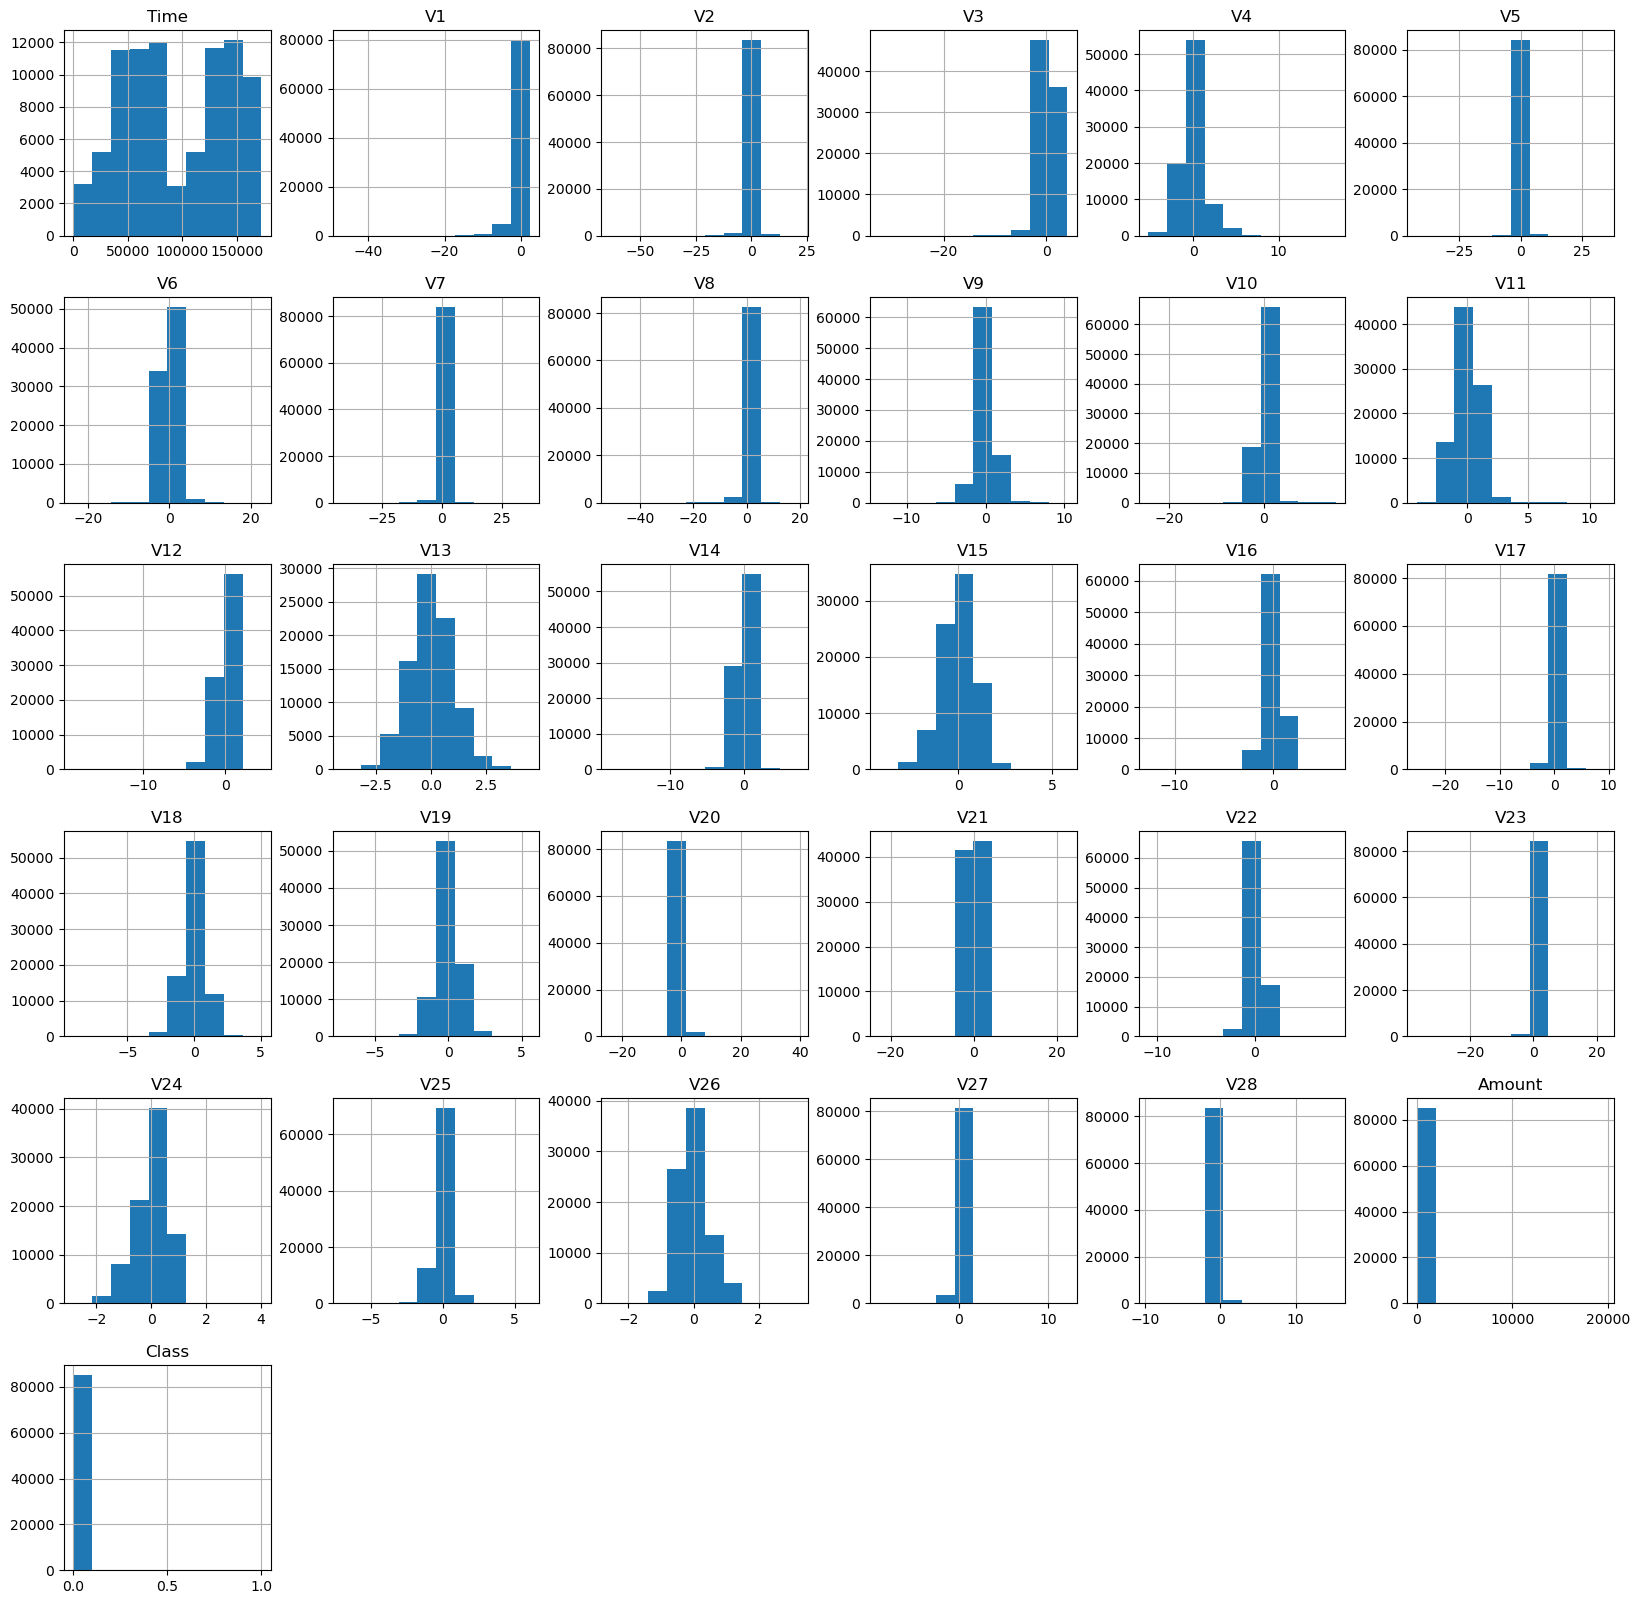

In [8]:
data.hist(figsize=(20,20))
plt.show()

In [9]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases : {}'.format(len(Fraud)))
print('Valid Cases : {}'.format(len(Valid)))

0.001582519605659559
Fraud Cases : 135
Valid Cases : 85307


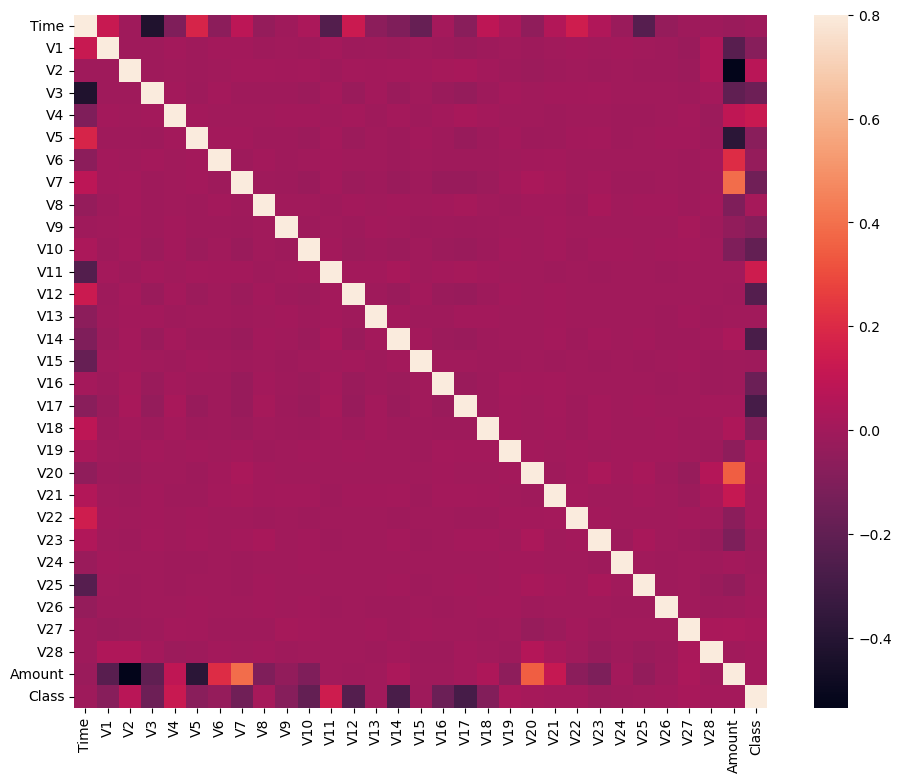

In [10]:
corrmat= data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)
plt.show()

In [11]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
X= data[columns]
Y= data[target]
print(X.shape)
print(Y.shape)

(85442, 30)
(85442,)


In [12]:
from sklearn.metrics import  classification_report , accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), 
                                        contamination=outlier_fraction, 
                                        random_state=state),
              "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                  contamination=outlier_fraction)
}

In [13]:
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred!=Y).sum()
    
    print('{} : {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))
    

Isolation Forest : 193
0.9977411577444348
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.29      0.29      0.29       135

    accuracy                           1.00     85442
   macro avg       0.64      0.64      0.64     85442
weighted avg       1.00      1.00      1.00     85442

Local Outlier Factor : 263
0.9969218885325718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.03      0.03      0.03       135

    accuracy                           1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442



In [14]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


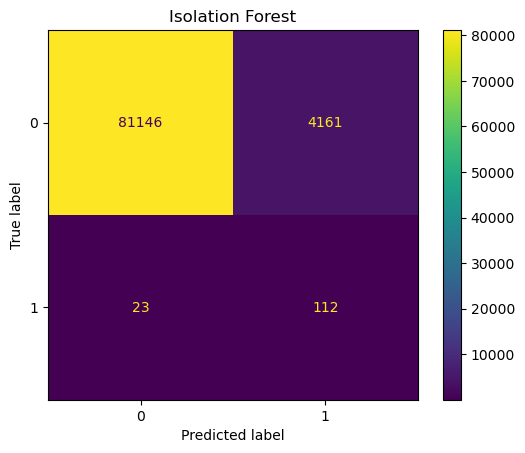

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Predict anomalies using Isolation Forest
y_pred_if = isolation_forest.predict(X)
y_pred_if = np.where(y_pred_if == -1, 1, 0)  # Convert to binary labels

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots a confusion matrix for the given predictions.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

# Example: Plot for Isolation Forest
plot_confusion_matrix(Y, y_pred_if, "Isolation Forest")


In [16]:
print("Y shape:", Y.shape)
print("y_pred_if shape:", y_pred_if.shape)


Y shape: (85442,)
y_pred_if shape: (85442,)


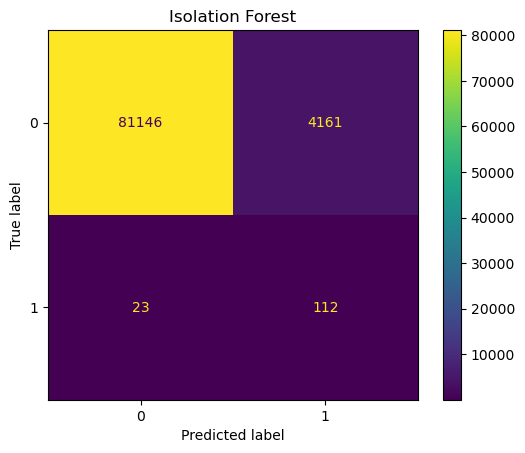

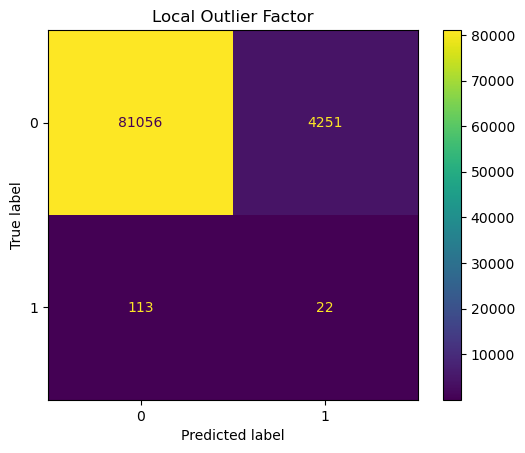

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Predict anomalies using Isolation Forest
y_pred_if = isolation_forest.predict(X)
y_pred_if = np.where(y_pred_if == -1, 1, 0)

# Define Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Predict anomalies using LOF
y_pred_lof = lof.fit_predict(X)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

# Plot for Isolation Forest
plot_confusion_matrix(Y, y_pred_if, "Isolation Forest")

# Plot for Local Outlier Factor
plot_confusion_matrix(Y, y_pred_lof, "Local Outlier Factor")



In [18]:
from sklearn.model_selection import GridSearchCV

# Example: Tune contamination for Isolation Forest
param_grid = {'contamination': [0.01, 0.02, 0.05, 0.1]}
grid_search = GridSearchCV(IsolationForest(random_state=state), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, Y)

best_model = grid_search.best_estimator_
print("Best Parameters for Isolation Forest:", grid_search.best_params_)


Best Parameters for Isolation Forest: {'contamination': 0.01}
